# https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int) # transform "g" and "h" to 1 and 0

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
df[df.columns[:-1]].values

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

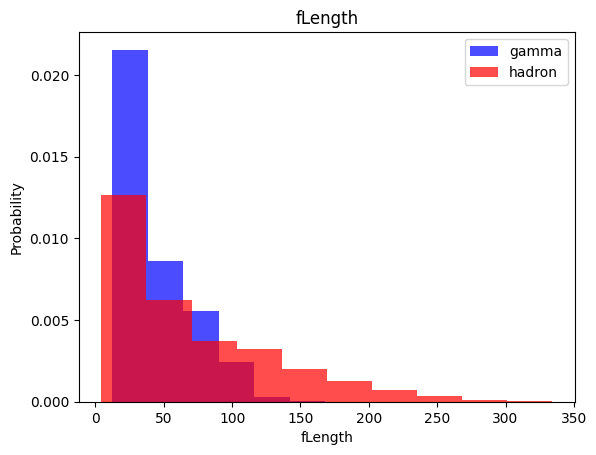

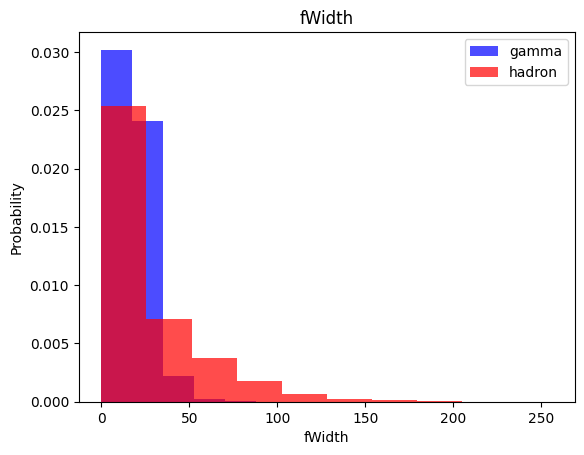

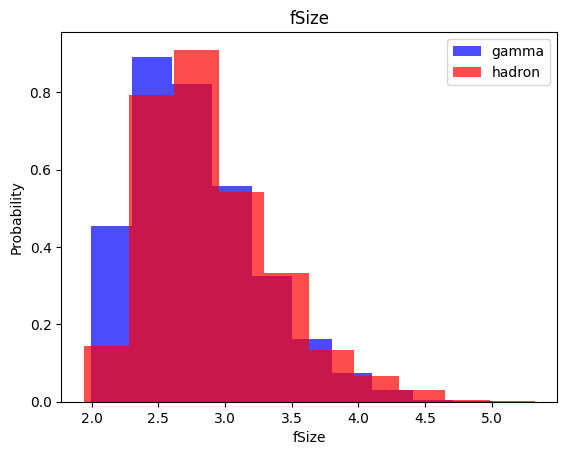

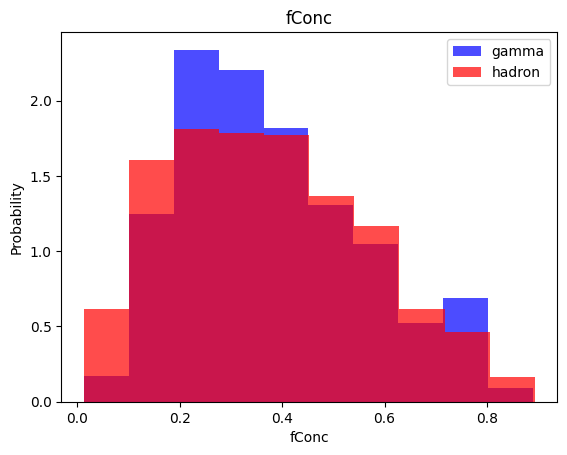

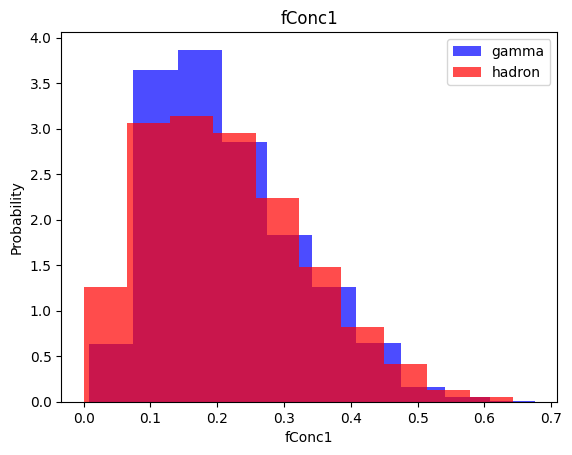

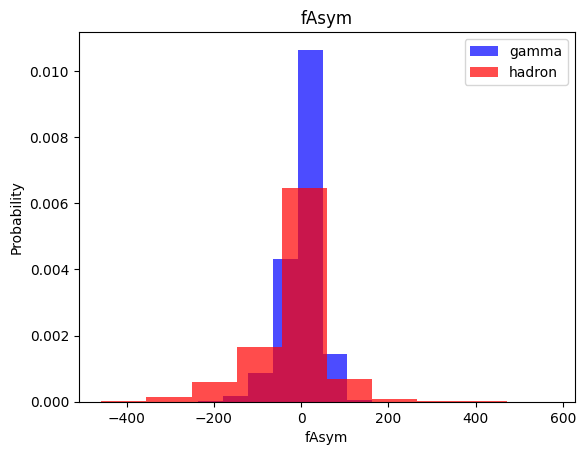

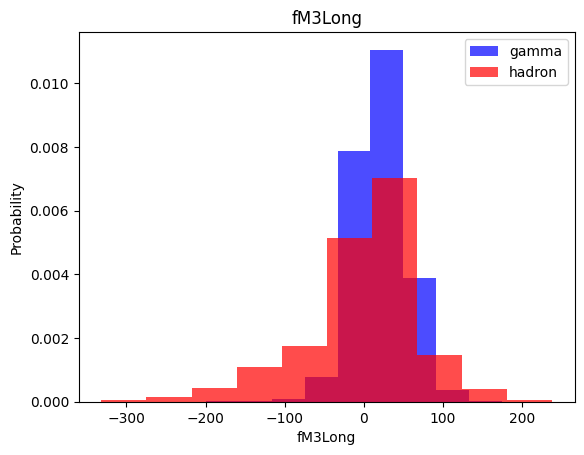

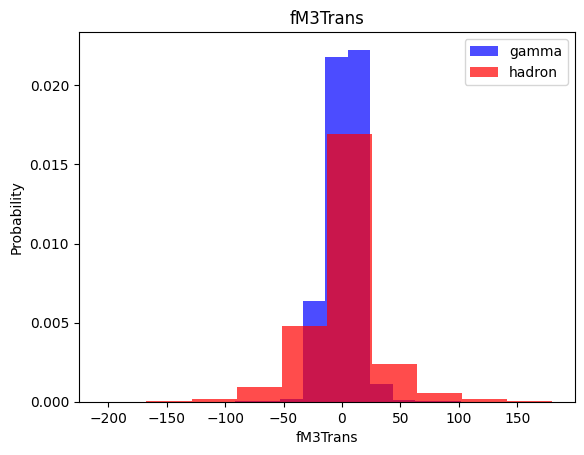

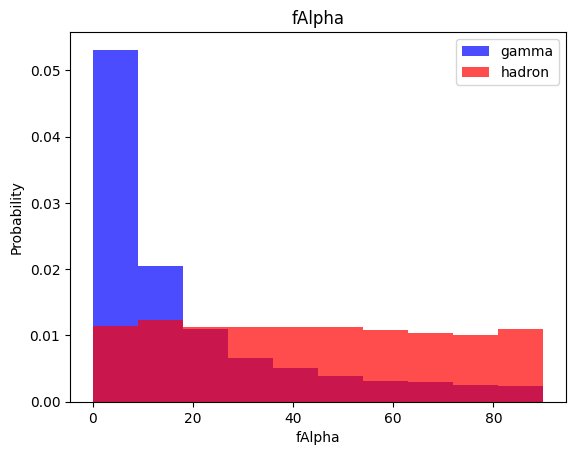

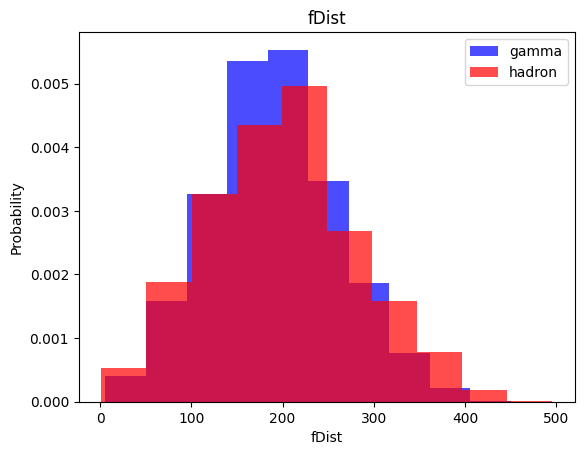

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


# Train, Validation, Teste

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # split (np.split) the data randomly (df.sample) into train (60%), validation (20%) and test (20%) data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7404
4008


In [ ]:
def scale_dataset(df, oversample = False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x) # scale the data new_x = (old_x - mean)/sd so that the mean becomes 0 and the standard deviation 1

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y) # balance classes

    data = np.hstack((x, np.reshape(y, (-1, 1)))) # reshape y from a 1D array into a 2D column vector and stack horizontally x with reshaped y

    return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True) # apply the scalling function to the data, and only balance classes in the train data
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
print(len(y_train))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))

14808
7404
7404


#Classification

#k-Nearest Neighbors

1. Choose the number of nearest neighbors "k"
2. Calculate the distance between the test point and all training points
3. Identify the "k" nearest points (and respective class) to the testing point
4. Count how many "k" points belong to each class
5. The class with more "k" points will be assigned to the testing point

#weighted kNN

Insted of couting how many "k" points belong to each class:
1. Calculate the weights = 1/distance to each "k" point
2. Sum the weights associated to "k" belonging to the same class
3. Class with largest sum of weights will be assigned to the testing point

#
1. Pros: is a simple method
2. Cons: may give poor results in sparse data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3) # create model
knn_model.fit(x_train, y_train) # train model

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict = knn_model.predict(x_test) # make prediction
print(classification_report(y_test, y_predict)) # compare prediction with true values

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1321
           1       0.86      0.84      0.85      2483

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
wknn_model = KNeighborsClassifier(n_neighbors=3, weights='distance') # create weighted k-nearest neighbor model
wknn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_predict = wknn_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1321
           1       0.86      0.84      0.85      2483

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Accuracy, Precision, Recall and f1-score

Confusion matrix:
TP: True Positives,
TN: True Negatines,
FP: False Positives,
FN: False Negatives,

Accuracy: Shows how correct a model is overall, that is, how much did it get right in relation to all prediction made.
1. Accuracy = (TP + TN)/(TP + TN + FP +FN)

Works better when the classes are balanced. If they are not balanced and the model is bad at predicting the class with fewer points, but good at predicting the class
with more points, the accuaracy will be overrated (and in extreme cases can be meaningless).

Precision: Shows how correctly the model predicts the positive class (or the target class of interest)
2. Precision = TP/(TP+FP)

Is usefull when the cost of falsely identifying a negative as a positive is high

Recall: Shows how correctly the model predicts true positives from all the actual positive points
3. Recall = TP/(TP+FN)

Is usefull when the cost of falsely identifying a positive as a negative is high

f1-score: Gives the harmonic mean of precision and recall

\begin{equation}
\text{f1-score } = 2*(Precision * Recall)/(Precision+Recall)
\end{equation}
​
Is useful when there is the need to account for both false positives and false negatives when the classes are not balanced.

#Naive Bayes

Simplifies the Bayes equation by assuming that all features (our cols) are independent.

Bayes equation
\begin{equation}
P(class_k|x_1, x_2,...,x_n) = \frac{P(x_1, x_2,...,x_n|class_k).P(class_k)}{P(x_1, x_2,...,x_n)}
\end{equation}

After independence assumption
\begin{equation}
P(class_k|x_1, x_2,...,x_n) \propto P(class_k) * \prod_{i=1}^{n} P(x_i|class_k)
\end{equation}

Prediction is obtained by finding the class that maximizes this probability for the feature vector provided, thus
\begin{equation}
\text{predicted } y = \textit{argmax } [\ P(class_k) * \prod_{i=1}^{n} P(x_i|class_k) ]\
\end{equation}

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB() # create model
nb_model = nb_model.fit(x_train, y_train) # train model

In [ ]:
y_predict = nb_model.predict(x_test) # make prediction
print(classification_report(y_test, y_predict)) # compare prediction with true values

              precision    recall  f1-score   support

           0       0.66      0.43      0.52      1321
           1       0.74      0.88      0.81      2483

    accuracy                           0.73      3804
   macro avg       0.70      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

Used for binary classification.

Uses a sigmoid function to transforms a linear equation into a equation with codomain between 0 and 1 that measures the probability of a point to belong to the positive class. Uses the Log Loss function to calculate the loss between the classes predicted $\hat{y}$ vs true classes $y$ and adjusts the weights, w_i, and intercept, b, using a gradient descent algorithm.

Linear Equation:
\begin{equation}
y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
\end{equation}

Sigmoid Function:
\begin{equation}
\sigma(y) = \frac{1}{1 + e^{-y}}
\end{equation}

Probability:
\begin{equation}
P(\text{positive class} \mid x) = \sigma(y)
\end{equation}

Loss:
\begin{equation}
\text{Log Loss} = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
\end{equation}

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression() # create model
log_model = log_model.fit(x_train, y_train) # train model

In [ ]:
y_predict = log_model.predict(x_test) # make prediction
print(classification_report(y_test, y_predict)) # compare prediction with true values

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1321
           1       0.85      0.81      0.83      2483

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM (Supervised Vector Machines)

Determines the line (or hyperplane for more than 2 features) that divides the space into two regions corresponding to the two classes.

The line is calculated by maximizing the margins, i.e., the distance between the line and the nearest points from each class (support vectors).

For more than two classes there are two possbilities
1. the process is repeated for each pair of classes, and then a voting mechanism determines the class of each point

2. the process is repeated treating all classes but one as a single class, and the classifier with the highest confidence score determines the class of each point

#
1. Pros: Effective in high-dimensional spaces
2. Cons: Bad against outlier points

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC() # create model
svm_model = svm_model.fit(x_train, y_train) # train model

In [ ]:
y_predict = svm_model.predict(x_test) # make prediction
print(classification_report(y_test, y_predict)) # compare prediction with true values

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1321
           1       0.90      0.88      0.89      2483

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Networks

Creates a network of layers of hidden neurons, in which the neurons of a layer receives as input the data points (or the output from neurons of the previous layer), computes a weighted sum of those inputs plus a bias, applies an activation function to that sum and passes the output to the neurons that belong to the next layer.

The activation function allows to obtain a non-linear response for the predictions passed by the output layer. This function also passes the responses as a probability.

After a prediction is calculated, the algorithm calculates the error between the probabilities calculated for the predicted classes and the true classes using a loss function and updates the weights and bias to minimize that error using gradient descent-like algorithms.

#
Pros:
1. Can model complex, non-linear relationships.
2. Works well with large datasets and high-dimensional data.

#
Cons:
1. Requires substantial computational power.
2. Prone to overfitting without regularization techniques(ex: drop neurons, work with batches)

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
nn_model = tf.keras.Sequential([ # sequential means that every neuron is connected to every node of the next layer
    # two hidden layers of 64 neurons each and a last layer with the output neuron
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu'), # relu does not have the vanishing gradient problem, and deactive some neurons for more generalized resutls
    tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid is a good option for binary classification
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy']) # compile the model (Adam is the parameter for the gradient descent)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0) # train model (we are using part of the training data as validation data)
# epochs: number of times the entire training dataset is passed through the neural network during training
# batch_size: number of training samples used in one forward and backward pass through the model.
#             dividing the dataset in batchs prevents overfitting (and it is faster)

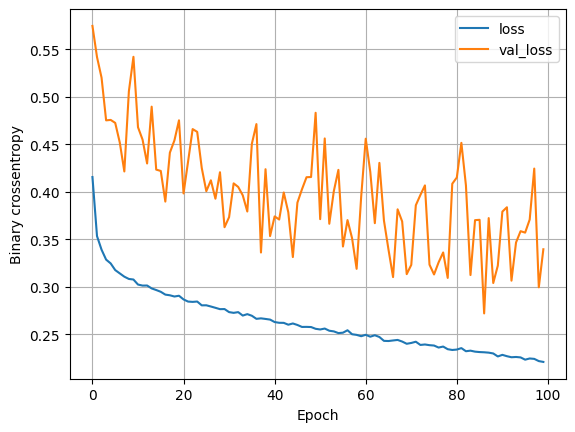

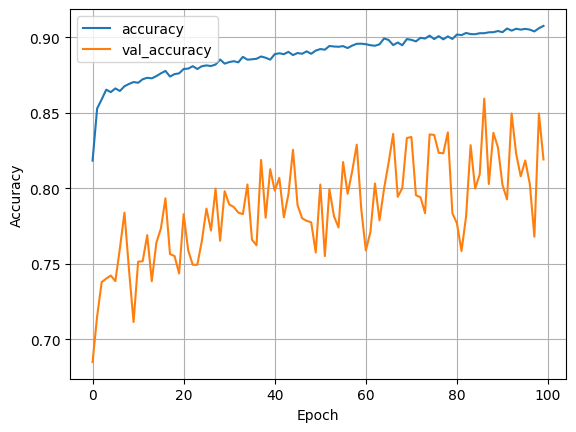

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid,y_valid), verbose=0) # same, but using our valid data as validation data

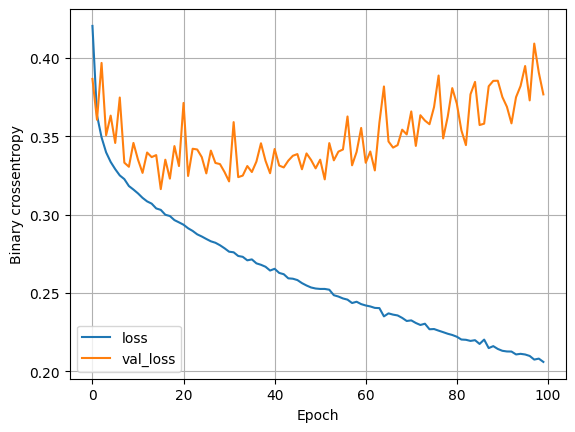

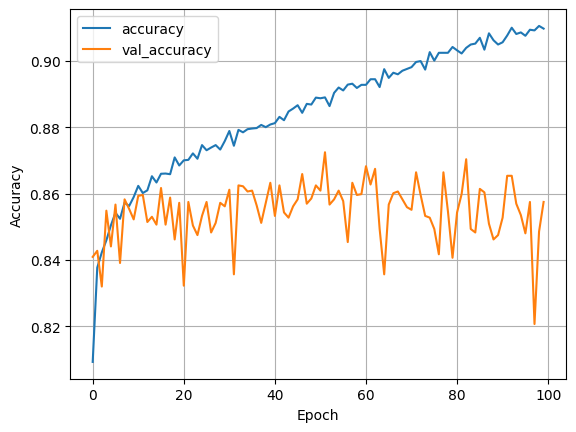

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()

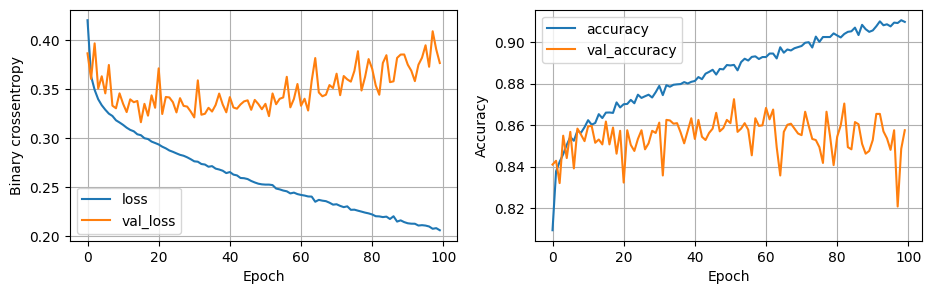

In [ ]:
plot_history(history) #single plot

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lrate, batch_size, num_epochs): # NN for different parameters, and with option of dropping neurons, with some probability
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob), # drop neurons with probability dropout_prob
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lrate), loss='binary_crossentropy', metrics=['accuracy']) # compile model

  history = nn_model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0) # train model

  return nn_model, history

In [ ]:
least_val_loss = float('inf')   # initial upper bound for the best model (least loss)
least_loss_model = None # initial best model
num_epochs = 10
for num_nodes in [16, 32, 64]: # run the model using different values for the hyperparameters
  for  dropout_prob in [0, 0.2]:
    for lrate in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
          print(f"{num_nodes} nodes, dropout {dropout_prob}, lrate {lrate}, bathsize {batch_size}")
          model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lrate, batch_size, num_epochs) # create, compile and train model
          plot_history(history) # plot the loss and accuracy
          val_loss = model.evaluate(x_valid, y_valid)[0] # [0] extracts the loss. we compiled the model with metrics = accuracy, so we also have access to it
          if val_loss < least_val_loss: # compare current model loss to best model loss and if its better (lesser), updates the least loss value and the best model
            least_val_loss = val_loss
            least_loss_model = model

In [ ]:
y_predict = least_loss_model.predict(x_test) # make prediction, using the best model
y_predict = (y_predict > 0.5).astype(int).reshape(-1,) # transform probabilities in classes, if P > 0.5 belong to class 1, if P < 0.5 does not belong to class 1 (automatically belong to class 0)
print(classification_report(y_test, y_predict)) # compare predictions with true values

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1324
           1       0.87      0.95      0.91      2480

    accuracy                           0.88      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.88      0.87      3804

